In [1]:
%run ../input/python-recipes/dhtml.py
%run ../input/python-recipes/keras_history_plot.py
dhtml('Code Modules & Settings','#00ff66',f3,fs7)

In [2]:
!pip install mplcyberpunk

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
import os,h5py,seaborn as sn,pylab as pl
import pandas as pd,numpy as np,tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as tkl
from tensorflow.keras import callbacks as tkc
fpath='../input/arrays-of-artificial-images/'

In [4]:
dhtml('Functions','#00ff66',f3,fs7)

In [5]:
def randi(nmin,nmax): 
    return np.random.randint(nmin,nmax)

def randch(a): 
    return np.random.choice(a,1)[0]

def randcoef():
    a=(.5+.1**6*randi(1,999999))\
      *randch([-1,1])
    b=randi(3,10)
    c=.1**3*randi(1,99)*randch([-1,1])
    return a,b,c

def randcoord(a,b,c):
    t=np.arange(0,16*b*np.pi,1/(1440*b))
    fx=np.sin(t/6)+\
       a*np.sin(b*t)*np.cos(t)-\
       c*np.sin(16*b*t)
    fy=np.cos(t/6)+\
       a*np.sin(b*t)*np.sin(t)-\
       c*np.cos(16*b*t)
    return fx,fy

def randcol():
    return [np.random.random(3)]

def checkplot(n):
    global images,labels,targets
    [a,c]=targets[n]; b=labels[n]
    fx,fy=randcoord(a,b,c)
    fig=pl.figure(figsize=(8,4))
    ax=fig.add_subplot(121)
    ax.scatter(fx,fy,s=.1**4,c=randcol())
    ax.set_axis_off()
    pl.tight_layout(pad=.05)
    ax=fig.add_subplot(122)
    ax.imshow(images[n])
    ax.set_axis_off()
    pl.show()

In [6]:
def cb(fw):
    early_stopping=tkc\
    .EarlyStopping(monitor='val_loss',
                   patience=20,verbose=2)
    checkpointer=tkc\
    .ModelCheckpoint(filepath=fw,verbose=2,
                     save_best_only=True)
    lr_reduction=tkc\
    .ReduceLROnPlateau(monitor='val_loss',verbose=2,
                       patience=5,factor=.8)
    return [checkpointer,early_stopping,lr_reduction]

def module_exists(module_name):
    try:
        __import__(module_name)
    except ImportError:
        return False
    else:
        return True
    
def glow_history_plot(fit_history,fig_size=10,
                      col1='#00ff66',col2='#6600ff'):
    if module_exists('mplcyberpunk'):
        import mplcyberpunk
    
    pl.figure(figsize=(fig_size,int(1.5*fig_size)))
    pl.subplot(311)
    keys=list(fit_history.history.keys())
    pl.plot(fit_history.history[keys[0]],
            color=col1,label='train')
    pl.plot(fit_history.history[keys[2]],
            color=col2,label='valid')
    pl.xlabel('epochs'); pl.ylabel(keys[0])
    pl.legend(); pl.title('loss')
    mplcyberpunk.add_glow_effects()    
    pl.subplot(312)
    pl.plot(fit_history.history[keys[1]],
            color=col1,label='train')
    pl.plot(fit_history.history[keys[3]],
            color=col2,label='valid')
    pl.xlabel('epochs'); pl.ylabel(keys[1])    
    pl.legend(); pl.title('accuracy')
    mplcyberpunk.add_glow_effects()
    pl.subplot(313)
    pl.plot(fit_history.history[keys[4]],
            color=col1,label='lr')
    pl.xlabel('epochs'); pl.ylabel(keys[4])    
    pl.legend(); pl.title('learning rate')
    mplcyberpunk.add_glow_effects(); pl.show()

In [7]:
dhtml('Data','#00ff66',f3,fs7)

In [8]:
fn='ArtificialImages01.h5'
with h5py.File(fpath+fn,'r') as f:
    keys=list(f.keys()); print(keys)
    images=np.array(f[keys[0]])
    labels=np.array(f[keys[1]])
    targets=np.array(f[keys[2]])
    f.close()

['images', 'labels', 'targets']


In [9]:
print(fn)
filenames=['ArtificialImages%02d'%(i+2)+'.h5'
           for i in range(19)]
for fn in filenames:
    print(fn)
    with h5py.File(fpath+fn,'r') as f:
        keys=list(f.keys())
        addimages=np.array(f[keys[0]])
        addlabels=np.array(f[keys[1]])
        addtargets=np.array(f[keys[2]])
        f.close()
    images=np.vstack([images,addimages])
    labels=np.vstack([labels.reshape(-1,1),
                      addlabels.reshape(-1,1)])
    targets=np.vstack([targets,addtargets])
labels=labels.reshape(-1)
img_size=images.shape[1]
images.shape,labels.shape,targets.shape

ArtificialImages01.h5
ArtificialImages02.h5
ArtificialImages03.h5
ArtificialImages04.h5
ArtificialImages05.h5
ArtificialImages06.h5
ArtificialImages07.h5
ArtificialImages08.h5
ArtificialImages09.h5
ArtificialImages10.h5
ArtificialImages11.h5
ArtificialImages12.h5
ArtificialImages13.h5
ArtificialImages14.h5
ArtificialImages15.h5
ArtificialImages16.h5
ArtificialImages17.h5
ArtificialImages18.h5
ArtificialImages19.h5
ArtificialImages20.h5


((3880, 288, 288, 3), (3880,), (3880, 2))

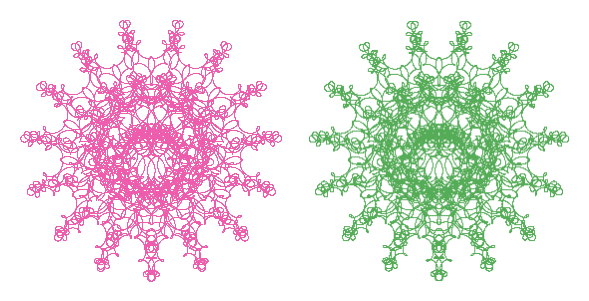

In [10]:
n=np.random.randint(labels.shape[0])
checkplot(n)

In [11]:
classes=list(set(labels))
num_classes=len(classes)
rd=dict(zip(classes,
            list(range(len(classes)))))
labels=np.array([rd.get(x,x) for x in labels],
                dtype=np.int32)
rd,classes,list(set(labels))

({3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6},
 [3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6])

In [12]:
N=labels.shape[0]; n=int(.1*N)
shuffle_ids=np.arange(N)
np.random.RandomState(12).shuffle(shuffle_ids)
images=images[shuffle_ids]
labels=labels[shuffle_ids]
targets=targets[shuffle_ids]
x_test,x_valid,x_train=\
images[:n],images[n:2*n],images[2*n:]
y_test,y_valid,y_train=\
labels[:n],labels[n:2*n],labels[2*n:]
y_test2,y_valid2,y_train2=\
targets[:n],targets[n:2*n],targets[2*n:]

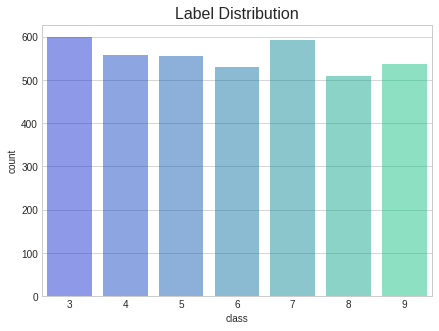

In [13]:
df=pd.DataFrame(labels,columns=['label'])
df['class']=[classes[l] for l in labels]
pl.figure(figsize=(7,5))
sn.countplot(x='class',data=df,
             palette='winter',alpha=.5)
ti='Label Distribution'
pl.title(ti,fontsize=16);

In [14]:
dhtml('Classification','#00ff66',f3,fs7)

In [15]:
%run ../input/python-recipes/base_cnn_model01.py

<Figure size 432x288 with 0 Axes>

In [16]:
base_conv2d=32; last_pool='avg'
cnn_model=base_cnn_model(
    base_conv2d,last_pool,num_classes,img_size)
fw='weights.best.hdf5'
history=cnn_model\
.fit(x_train,y_train,epochs=200,
     batch_size=64,verbose=2,
     validation_data=(x_valid,y_valid),
     callbacks=cb(fw))

Epoch 1/200

Epoch 00001: val_loss improved from inf to 1.88401, saving model to weights.best.hdf5
49/49 - 7s - loss: 1.9398 - accuracy: 0.1717 - val_loss: 1.8840 - val_accuracy: 0.2655
Epoch 2/200

Epoch 00002: val_loss improved from 1.88401 to 1.80001, saving model to weights.best.hdf5
49/49 - 6s - loss: 1.8567 - accuracy: 0.2207 - val_loss: 1.8000 - val_accuracy: 0.2912
Epoch 3/200

Epoch 00003: val_loss improved from 1.80001 to 1.78933, saving model to weights.best.hdf5
49/49 - 6s - loss: 1.8152 - accuracy: 0.2400 - val_loss: 1.7893 - val_accuracy: 0.2784
Epoch 4/200

Epoch 00004: val_loss improved from 1.78933 to 1.78351, saving model to weights.best.hdf5
49/49 - 6s - loss: 1.7880 - accuracy: 0.2568 - val_loss: 1.7835 - val_accuracy: 0.2655
Epoch 5/200

Epoch 00005: val_loss improved from 1.78351 to 1.74545, saving model to weights.best.hdf5
49/49 - 6s - loss: 1.7686 - accuracy: 0.2655 - val_loss: 1.7455 - val_accuracy: 0.2990
Epoch 6/200

Epoch 00006: val_loss improved from 1.745

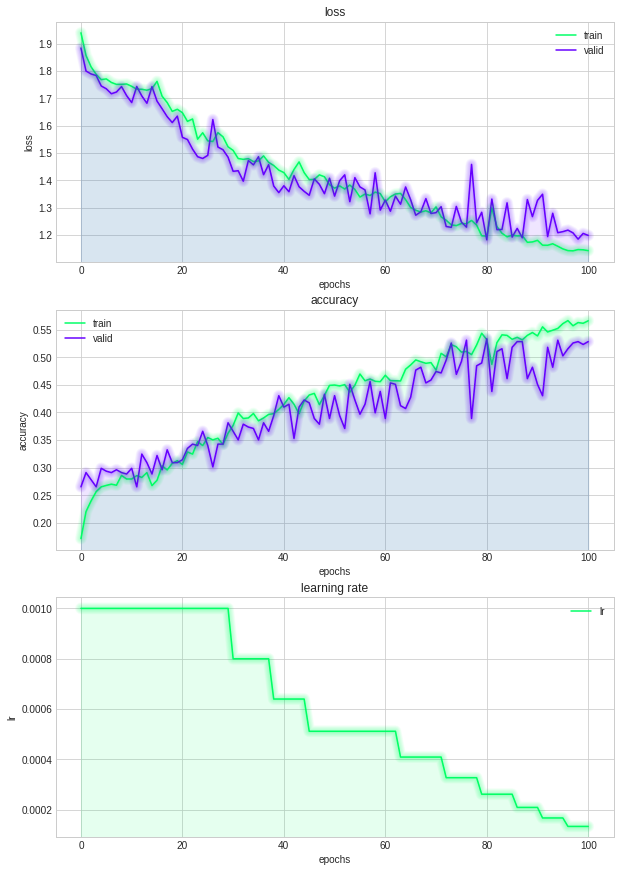

In [17]:
glow_history_plot(history)

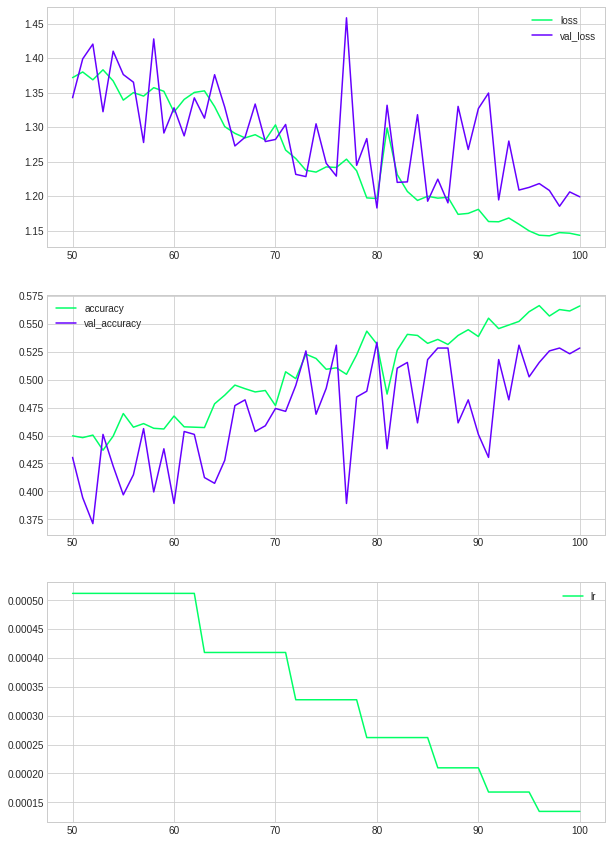

In [18]:
keras_history_plot(history,start=50,end=200)

In [19]:
df_history=pandas_history(history,True)
df_history.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,1.939775,0.171714,1.884009,0.265464,0.001
1,1.856674,0.220683,1.800013,0.291237,0.001
2,1.815154,0.240013,1.789330,0.278351,0.001
3,1.788021,0.256765,1.783510,0.265464,0.001
4,1.768644,0.265464,1.745453,0.298969,0.001


In [20]:
cnn_model.load_weights(fw)
cnn_model.evaluate(x_test,y_test)

13/13 [==============================] - 0s 22ms/step - loss: 1.2337 - accuracy: 0.5155


[1.2336986064910889, 0.5154638886451721]